True Labels:          [0 1 1 0]
Linear Predictions:   [0 0 0 0]
Non-linear MLP Pred:  [1 1 1 0]


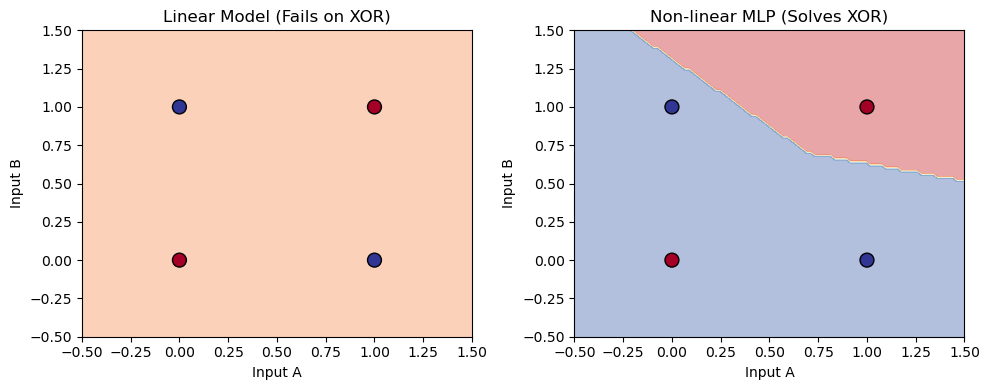

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# XOR data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# Linear Model (Logistic Regression)
linear_model = LogisticRegression()
linear_model.fit(X, y)
linear_preds = linear_model.predict(X)

# Non-linear Model (MLP with 1 hidden layer)
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=0)
mlp.fit(X, y)
mlp_preds = mlp.predict(X)

# Results
print("True Labels:         ", y)
print("Linear Predictions:  ", linear_preds)
print("Non-linear MLP Pred: ", mlp_preds)

# Plotting
def plot_model(title, model):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("Input A")
    plt.ylabel("Input B")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_model("Linear Model (Fails on XOR)", linear_model)

plt.subplot(1, 2, 2)
plot_model("Non-linear MLP (Solves XOR)", mlp)
plt.tight_layout()
plt.show()
